In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import skimage
import sklearn
import pandas as pd
import scipy
import math

In [2]:
import os
import glob

dataset_path = './dataset_new/'
train_path = os.path.join(dataset_path,'train','*','*')
test_path = os.path.join(dataset_path,'test','*')

train_files = glob.glob(train_path)
test_files = glob.glob(test_path)

./dataset_new/train/cats/cat.3047.jpg


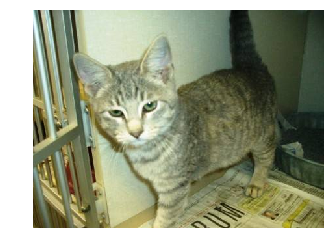

(335, 448, 3)
max 255
min 0


In [3]:
import random
import skimage.io

random_file = random.choice(train_files)
print(random_file)

img = skimage.io.imread(random_file)
plt.figure()
plt.axis('off')
plt.imshow(img)
plt.show()
print(img.shape)
print("max " + str(img.max()))
print("min " + str(img.min()))

uint8


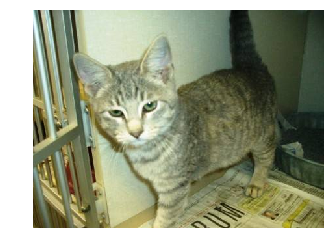

(-0.5, 447.5, 334.5, -0.5)

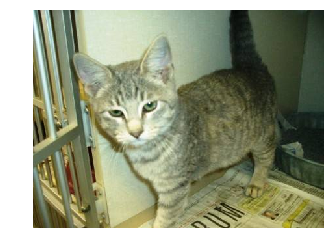

In [4]:
from skimage.filters import gaussian, laplace
from skimage.color import rgb2gray

def normalize(img):
    img_ = (img-img.min())*255.0/(img.max()-img.min())
    img_ = np.array(img_, dtype=np.uint32)
    return img_

img_ = normalize(img)

print(img.dtype)
plt.figure()
plt.axis('off')
plt.imshow(img_)

plt.show()
plt.imshow(img)
plt.axis('off')

# RGB histogram

Text(0.5,1,'BLUE channel')

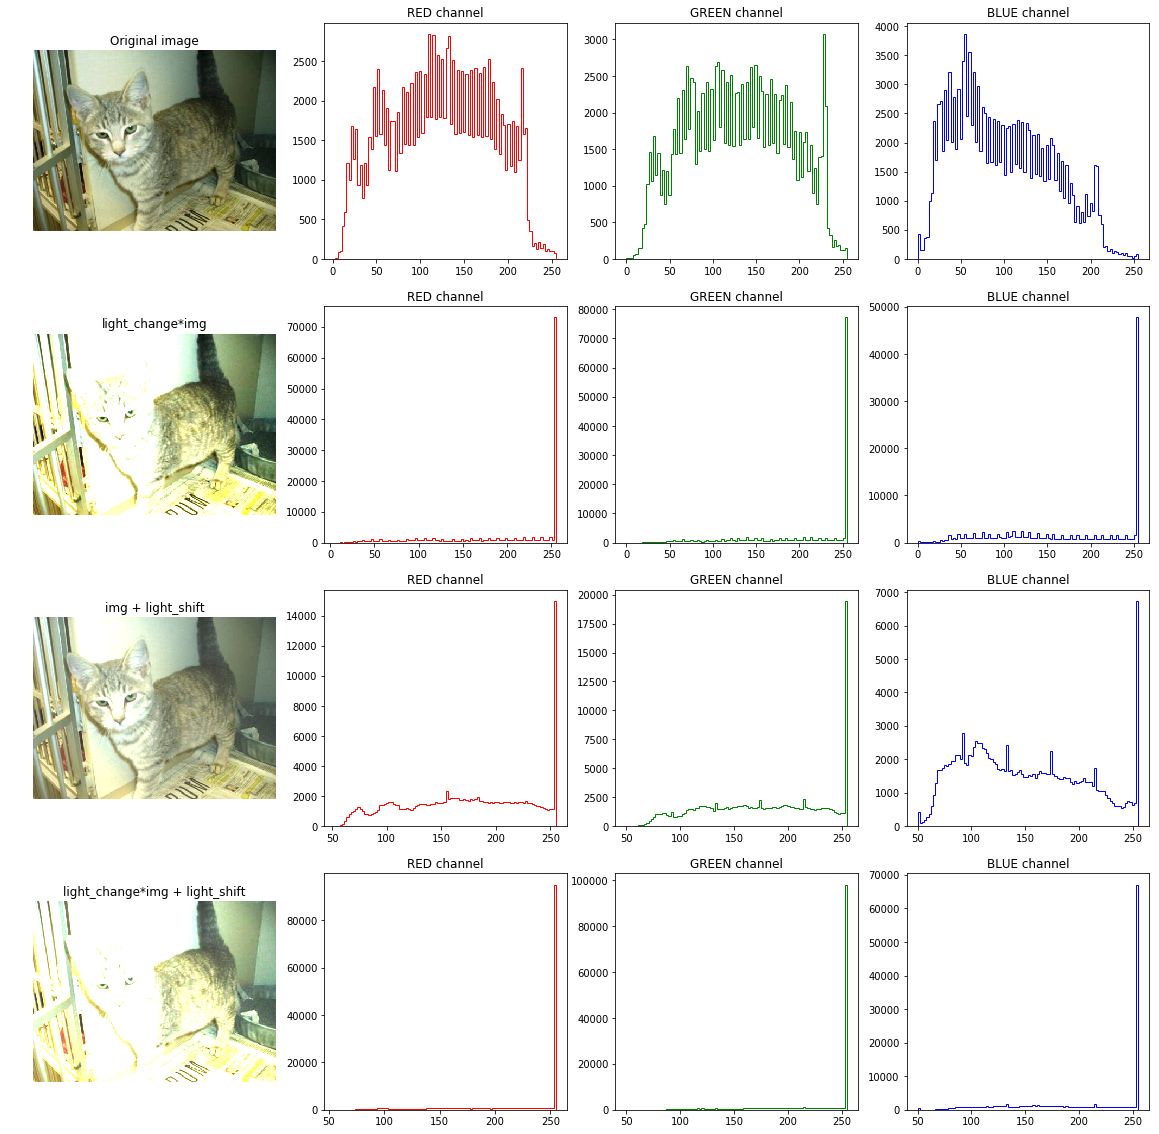

In [5]:
a, o1 = 2, 50
b, c = 3, 4
light_change = np.array([[a,a,a]])
light_shift = np.array([o1,o1,o1])
light_color = np.array([a,b,c])
#print(light)

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

#================================================================================

ax1 = fig.add_subplot(4,4,1)
ax1.imshow(img)
ax1.set_title("Original image")
ax1.set_axis_off()

bins_=100
ax1 = fig.add_subplot(4,4,2)
plt.hist(img[...,0].flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax1 = fig.add_subplot(4,4,3)
plt.hist(img[...,1].flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax1 = fig.add_subplot(4,4,4)
plt.hist(img[...,2].flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")

#================================================================================

ax2 = fig.add_subplot(4,4,5)
img2 = light_change*img
img2 = np.clip(img2,0,255)
img2 = np.array(img2, dtype=np.uint8)
ax2.imshow(img2)
ax2.set_title("light_change*img")
ax2.set_axis_off()

ax2 = fig.add_subplot(4,4,6)
plt.hist(img2[...,0].flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax2 = fig.add_subplot(4,4,7)
plt.hist(img2[...,1].flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax2 = fig.add_subplot(4,4,8)
plt.hist(img2[...,2].flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")

#================================================================================

ax3 = fig.add_subplot(4,4,9)
img3 = img + light_shift
img3 = np.clip(img3,0,255)
img3 = np.array(img3, dtype=np.uint8)
ax3.imshow(img3)
ax3.set_title("img + light_shift")
ax3.set_axis_off()

ax3 = fig.add_subplot(4,4,10)
plt.hist(img3[...,0].flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax3 = fig.add_subplot(4,4,11)
plt.hist(img3[...,1].flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax3 = fig.add_subplot(4,4,12)
plt.hist(img3[...,2].flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")

#================================================================================

ax4 = fig.add_subplot(4,4,13)
img4 = light_change*img + light_shift
img4 = np.clip(img4,0,255)
img4 = np.array(img4, dtype=np.uint8)
ax4.imshow(img4)
ax4.set_title("light_change*img + light_shift")
ax4.set_axis_off()

ax4 = fig.add_subplot(4,4,14)
plt.hist(img4[...,0].flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax4 = fig.add_subplot(4,4,15)
plt.hist(img4[...,1].flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax4 = fig.add_subplot(4,4,16)
plt.hist(img4[...,2].flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")

#plt.figure()
#plt.imshow(light*img)
#plt.show()

# Opponent histogram

![title](./opponent.png)

Text(0.5,1,'O2')

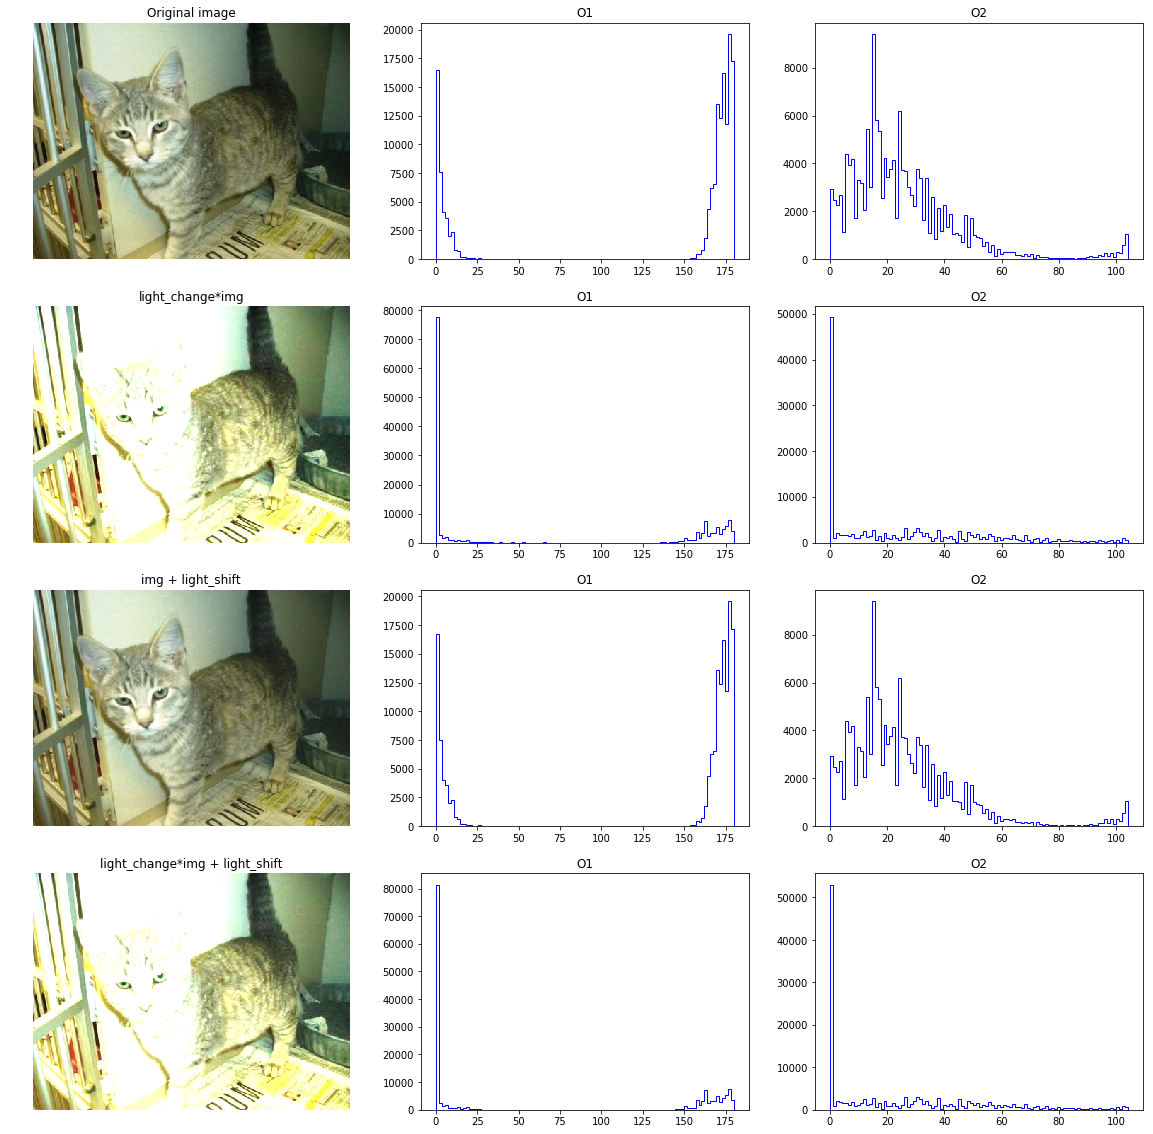

In [6]:
a, o1 = 2, 10
b, c = 3, 4
light_change = np.array([[a,a,a]])
light_shift = np.array([o1,o1,o1])
light_color = np.array([a,b,c])
#print(light)

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

#================================================================================

ax1 = fig.add_subplot(4,3,1)
ax1.imshow(img)
ax1.set_title("Original image")
ax1.set_axis_off()

O1 = (img[...,0]-img[...,1])/math.sqrt(2)
O2 = (img[...,0]+img[...,1]-2*img[...,2])/math.sqrt(6)

bins_=100
ax1 = fig.add_subplot(4,3,2)
plt.hist(O1.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O1")

ax1 = fig.add_subplot(4,3,3)
plt.hist(O2.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O2")

#================================================================================

ax2 = fig.add_subplot(4,3,4)
img2 = light_change*img
img2 = np.clip(img2,0,255)
img2 = np.array(img2, dtype=np.uint8)
ax2.imshow(img2)
ax2.set_title("light_change*img")
ax2.set_axis_off()

O1 = (img2[...,0]-img2[...,1])/math.sqrt(2)
O2 = (img2[...,0]+img2[...,1]-2*img2[...,2])/math.sqrt(6)

bins_=100
ax2 = fig.add_subplot(4,3,5)
plt.hist(O1.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O1")

ax2 = fig.add_subplot(4,3,6)
plt.hist(O2.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O2")

#================================================================================

ax3 = fig.add_subplot(4,3,7)
img3 = img + light_shift
img3 = np.clip(img3,0,255)
img3 = np.array(img3, dtype=np.uint8)
ax3.imshow(img3)
ax3.set_title("img + light_shift")
ax3.set_axis_off()

O1 = (img3[...,0]-img3[...,1])/math.sqrt(2)
O2 = (img3[...,0]+img3[...,1]-2*img3[...,2])/math.sqrt(6)

bins_=100
ax3 = fig.add_subplot(4,3,8)
plt.hist(O1.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O1")

ax2 = fig.add_subplot(4,3,9)
plt.hist(O2.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O2")

#================================================================================

ax4 = fig.add_subplot(4,3,10)
img4 = light_change*img + light_shift
img4 = np.clip(img4,0,255)
img4 = np.array(img4, dtype=np.uint8)
ax4.imshow(img4)
ax4.set_title("light_change*img + light_shift")
ax4.set_axis_off()

O1 = (img4[...,0]-img4[...,1])/math.sqrt(2)
O2 = (img4[...,0]+img4[...,1]-2*img4[...,2])/math.sqrt(6)

bins_=100
ax4 = fig.add_subplot(4,3,11)
plt.hist(O1.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O1")

ax4 = fig.add_subplot(4,3,12)
plt.hist(O2.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("O2")

#plt.figure()
#plt.imshow(light*img)
#plt.show()

# Transformed color

![title](./transformed.png)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'BLUE channel')

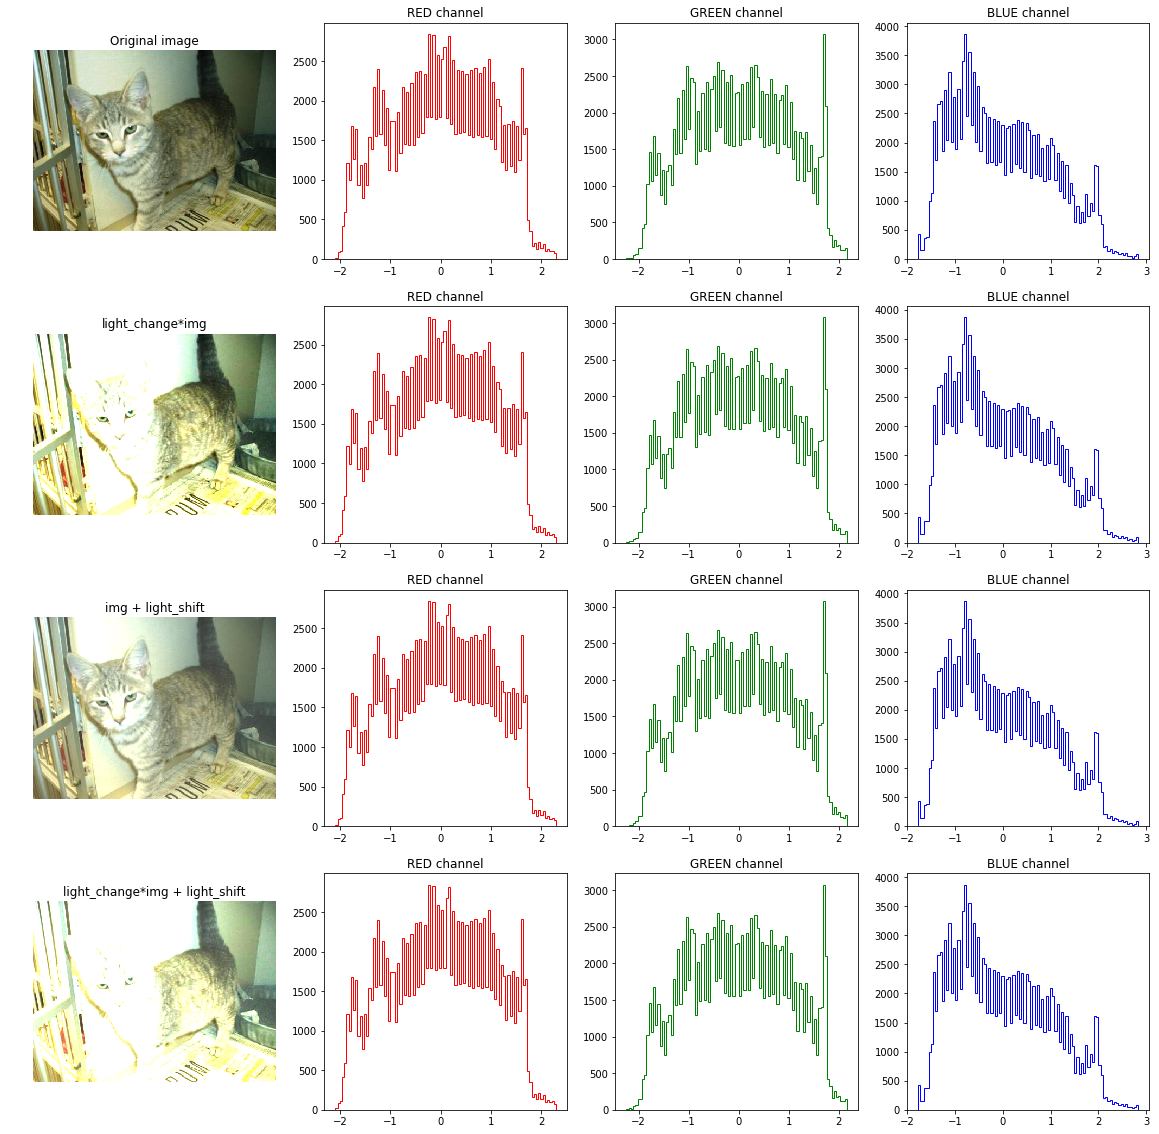

In [7]:
a, o1 = 2, 50
b, c = 3, 4
light_change = np.array([[a,a,a]])
light_shift = np.array([o1,o1,o1])
light_color = np.array([a,b,c])
#print(light)

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

#================================================================================

ax1 = fig.add_subplot(4,4,1)
ax1.imshow(img)
ax1.set_title("Original image")
ax1.set_axis_off()

R = (img[:,:,0] - np.mean(img[:,:,0])) / np.std(img[:,:,0])
G = (img[:,:,1] - np.mean(img[:,:,1])) / np.std(img[:,:,1])
B = (img[:,:,2] - np.mean(img[:,:,2])) / np.std(img[:,:,2])

bins_=100
ax1 = fig.add_subplot(4,4,2)
plt.hist(R.flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax1 = fig.add_subplot(4,4,3)
plt.hist(G.flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax1 = fig.add_subplot(4,4,4)
plt.hist(B.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")

#================================================================================

ax2 = fig.add_subplot(4,4,5)
img2 = light_change*img
#img2 = np.clip(img2,0,255)
#print(img[...,0]/img2[...,0])
img2 = np.array(img2, dtype=np.uint32)
ax2.imshow(img2)
ax2.set_title("light_change*img")
ax2.set_axis_off()

R = (img2[...,0] - np.mean(img2[...,0])) / np.std(img2[...,0])
G = (img2[...,1] - np.mean(img2[...,1])) / np.std(img2[...,1])
B = (img2[...,2] - np.mean(img2[...,2])) / np.std(img2[...,2])

bins_=100
ax2 = fig.add_subplot(4,4,6)
plt.hist(R.flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax2 = fig.add_subplot(4,4,7)
plt.hist(G.flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax2 = fig.add_subplot(4,4,8)
plt.hist(B.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")

#================================================================================

ax3 = fig.add_subplot(4,4,9)
img3 = img + light_shift
#img3 = np.clip(img3,0,255)
img3 = np.array(img3, dtype=np.uint32)
ax3.imshow(img3)
ax3.set_title("img + light_shift")
ax3.set_axis_off()

R = (img3[...,0] - np.mean(img3[...,0])) / np.std(img3[...,0])
G = (img3[...,1] - np.mean(img3[...,1])) / np.std(img3[...,1])
B = (img3[...,2] - np.mean(img3[...,2])) / np.std(img3[...,2])

bins_=100
ax3 = fig.add_subplot(4,4,10)
plt.hist(R.flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax3 = fig.add_subplot(4,4,11)
plt.hist(G.flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax3 = fig.add_subplot(4,4,12)
plt.hist(B.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")

#================================================================================

ax4 = fig.add_subplot(4,4,13)
img4 = light_change*img + light_shift
#img4 = np.clip(img4,0,255)
img4 = np.array(img4, dtype=np.uint32)
ax4.imshow(img4)
ax4.set_title("light_change*img + light_shift")
ax4.set_axis_off()

R = (img4[...,0] - np.mean(img4[...,0])) / np.std(img4[...,0])
G = (img4[...,1] - np.mean(img4[...,1])) / np.std(img4[...,1])
B = (img4[...,2] - np.mean(img4[...,2])) / np.std(img4[...,2])

bins_=100
ax4 = fig.add_subplot(4,4,14)
plt.hist(R.flatten(),bins=bins_,histtype='step',color='red')
plt.title("RED channel")

ax4 = fig.add_subplot(4,4,15)
plt.hist(G.flatten(),bins=bins_,histtype='step',color='green')
plt.title("GREEN channel")

ax4 = fig.add_subplot(4,4,16)
plt.hist(B.flatten(),bins=bins_,histtype='step',color='blue')
plt.title("BLUE channel")
#plt.figure()
#plt.imshow(light*img)
#plt.show()